# Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# activate autoreload!

import vector_tiler as vt
import importlib

# Demonstrate tiling functionality for given zoom level on toy example

<module 'simple_tiler' from 'C:\\Users\\Notna\\OneDrive\\DS\\projects\\vanilla_tiles\\simple_tiler.py'>

grid_intersections: [-1000.  -750.  -500.  -250.     0.   250.   500.   750.  1000.]
relevant grid intervals: {'x': [4, 4], 'y': [3, 4]}
corresponding axes values: {'x': [0.0, 250.0], 'y': [250.0, -250.0]}


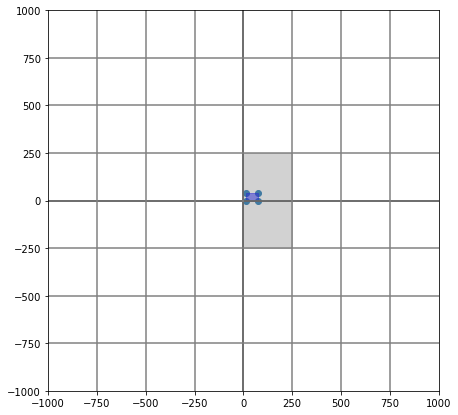

In [4]:
# create tiler object with TMS based on cartesian coordinates, ranging from -1000 to 1000
pbf_srid = 0
crs_max = 1000
tiler = vt.VectorTiler(crs_max, pbf_srid, reproject=False) #disable automatic reprojection

# override bbox attribute (normally derived from target geom) with a toy example
tiler.bbox = {"xmin": 14.9, "xmax": 77.3, "ymin": -3.2, "ymax": 40.3} 

# For a given zoom level, visualize tiling results
zoom_level = 3
tiler.check_tiling(zoom_level)

# Create example vector tile cache in WebMercatorQuad

In [20]:
# input parameters
tileset_name = "Verwaltungseinheiten"
p = "C:/Users/Notna/OneDrive/DS/projects/vanilla_tiles/"
pbf_srid = 3857
crs_max = 20037508.3427892 #value taken from: https://github.com/pramsey/minimal-mvt/blob/master/minimal-mvt.py

In [18]:
# instantiate tiler object
vtiler = vt.VectorTiler(crs_max, pbf_srid)

<module 'simple_tiler' from 'C:\\Users\\Notna\\OneDrive\\DS\\projects\\vanilla_tiles\\simple_tiler.py'>

Geom has following srid:  25832
A reprojected copy was created. It will be used for tiling and deleted after completion.


In [21]:
vtiler.generate_tileset(p, tileset_name, zoomlevel_range=(0,15))

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Generating tiles for zoom level 0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Generating tiles for zoom level 1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Generating tiles for zoom level 2


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Generating tiles for zoom level 3


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Generating tiles for zoom level 4


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Generating tiles for zoom level 5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Generating tiles for zoom level 6


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Generating tiles for zoom level 7


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Generating tiles for zoom level 8


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Generating tiles for zoom level 9


  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

Generating tiles for zoom level 10


  0%|                                                                                           | 0/84 [00:00<?, ?it/s]

Generating tiles for zoom level 11


  0%|                                                                                          | 0/276 [00:00<?, ?it/s]

Generating tiles for zoom level 12


  0%|                                                                                         | 0/1012 [00:00<?, ?it/s]

Generating tiles for zoom level 13


  0%|                                                                                         | 0/3960 [00:00<?, ?it/s]

Generating tiles for zoom level 14


  0%|                                                                                        | 0/15575 [00:00<?, ?it/s]

Generating tiles for zoom level 15


100%|████████████████████████████████████████████████████████████████████████████| 15575/15575 [38:15<00:00,  6.79it/s]


AttributeError: 'SimpleTiler' object has no attribute 'db_connection'

# Further testing scenarios for bounding boxes
Outdated snippet. Kept this as reminder for structuring testing scenarios,
because I encountered some tiling bugs when bbox coordinates exactly intersect with grid lines of a given zoom level.
So far, they are resolved, and in case similar bugs reappear, those scenarios can be used for debugging.

In [7]:
# test different bboxes of target geoms: bottom left, bottom right, top right, top left
test_bboxes = [
    [(4.5,-4.5), (7, -4.5), (7,4.5), (4.5,4.5)], #all values BETWEEN cutpoints of zoom level 2
    [(5,-4.5), (7, -4.5), (7,4.5), (5,4.5)], #X values ON cutpoints of zoom level 2
    [(4.5,-5), (7, -5), (7, 0), (4.5, 0)], #Y values ON cutpoints of zoom level 2
    [(-10,-4.5), (10, -4.5), (10,4.5), (-10,4.5)], #X values span MIN and MAX cutpoints of zoom level 2    
    [(4.5,-10), (7, -10), (7,10), (4.5,10)] #Y values span MIN and MAX cutpoints of zoom level 2
]